In [32]:
import plotly

In [33]:
print("Hello")

Hello


In [68]:
import plotly.express as px
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from datetime import datetime

In [69]:
covid_df=pd.read_csv('/content/drive/MyDrive/Datasets/covid_19_india.csv')

In [70]:
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [71]:
 covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [72]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [73]:
vaccine_df=pd.read_csv('/content/drive/MyDrive/Datasets/covid_vaccine_statewise.csv')

In [74]:
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [75]:
covid_df.drop(["Sno","ConfirmedIndianNational","ConfirmedForeignNational","Time"],inplace=True,axis=1)

In [76]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [77]:
covid_df["Date"]=pd.to_datetime(covid_df["Date"], format= '%Y-%m-%d')

In [78]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [79]:
covid_df['Active cases']=covid_df['Confirmed']-(covid_df['Cured']+covid_df['Deaths'])

In [80]:
covid_df.tail(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active cases
18100,2021-08-11,Puducherry,119115,1800,121766,851
18101,2021-08-11,Punjab,582791,16322,599573,460
18102,2021-08-11,Rajasthan,944700,8954,953851,197
18103,2021-08-11,Sikkim,25095,356,28018,2567
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130,20363
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [81]:
statewise=pd.pivot_table(covid_df, values=["Confirmed","Deaths","Cured"],index="State/UnionTerritory",aggfunc=max)

In [82]:
statewise.head(10)

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Bihar****,715730,701234,9452
Cases being reassigned to states,9265,0,0
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544


In [83]:
statewise["Recovery rate"]=(statewise['Cured']*100)/statewise['Confirmed']

In [84]:
statewise["Mortality rate"]=(statewise['Deaths']*100)/statewise['Confirmed']

In [85]:
#statewise.drop(["Mortality rate"],inplace=True,axis=1)
statewise.head(10)

,Confirmed,Cured,Deaths,Recovery rate,Mortality rate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,7548,7412,129,98.198198,1.709062
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Arunachal Pradesh,50605,47821,248,94.498567,0.490070
Assam,576149,559684,5420,97.142232,0.940729
Bihar,725279,715352,9646,98.631285,1.329971
Bihar****,715730,701234,9452,97.974655,1.320610
Cases being reassigned to states,9265,0,0,0.000000,0.000000
Chandigarh,61992,61150,811,98.641760,1.308233
Chhattisgarh,1003356,988189,13544,98.488373,1.349870


In [86]:
statewise=statewise.sort_values(by='Mortality rate', ascending=False)

In [87]:
statewise.style.background_gradient(cmap="cubehelix")

,Confirmed,Cured,Deaths,Recovery rate,Mortality rate
State/UnionTerritory,,,,,
Punjab,599573,582791,16322,97.201008,2.722271
Uttarakhand,342462,334650,7368,97.718871,2.151480
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Nagaland,28811,26852,585,93.200514,2.030474
Goa,172085,167978,3164,97.613389,1.838626
Delhi,1436852,1411280,25068,98.220276,1.744647
Himanchal Pradesh,204516,200040,3507,97.811418,1.714780
Andaman and Nicobar Islands,7548,7412,129,98.198198,1.709062


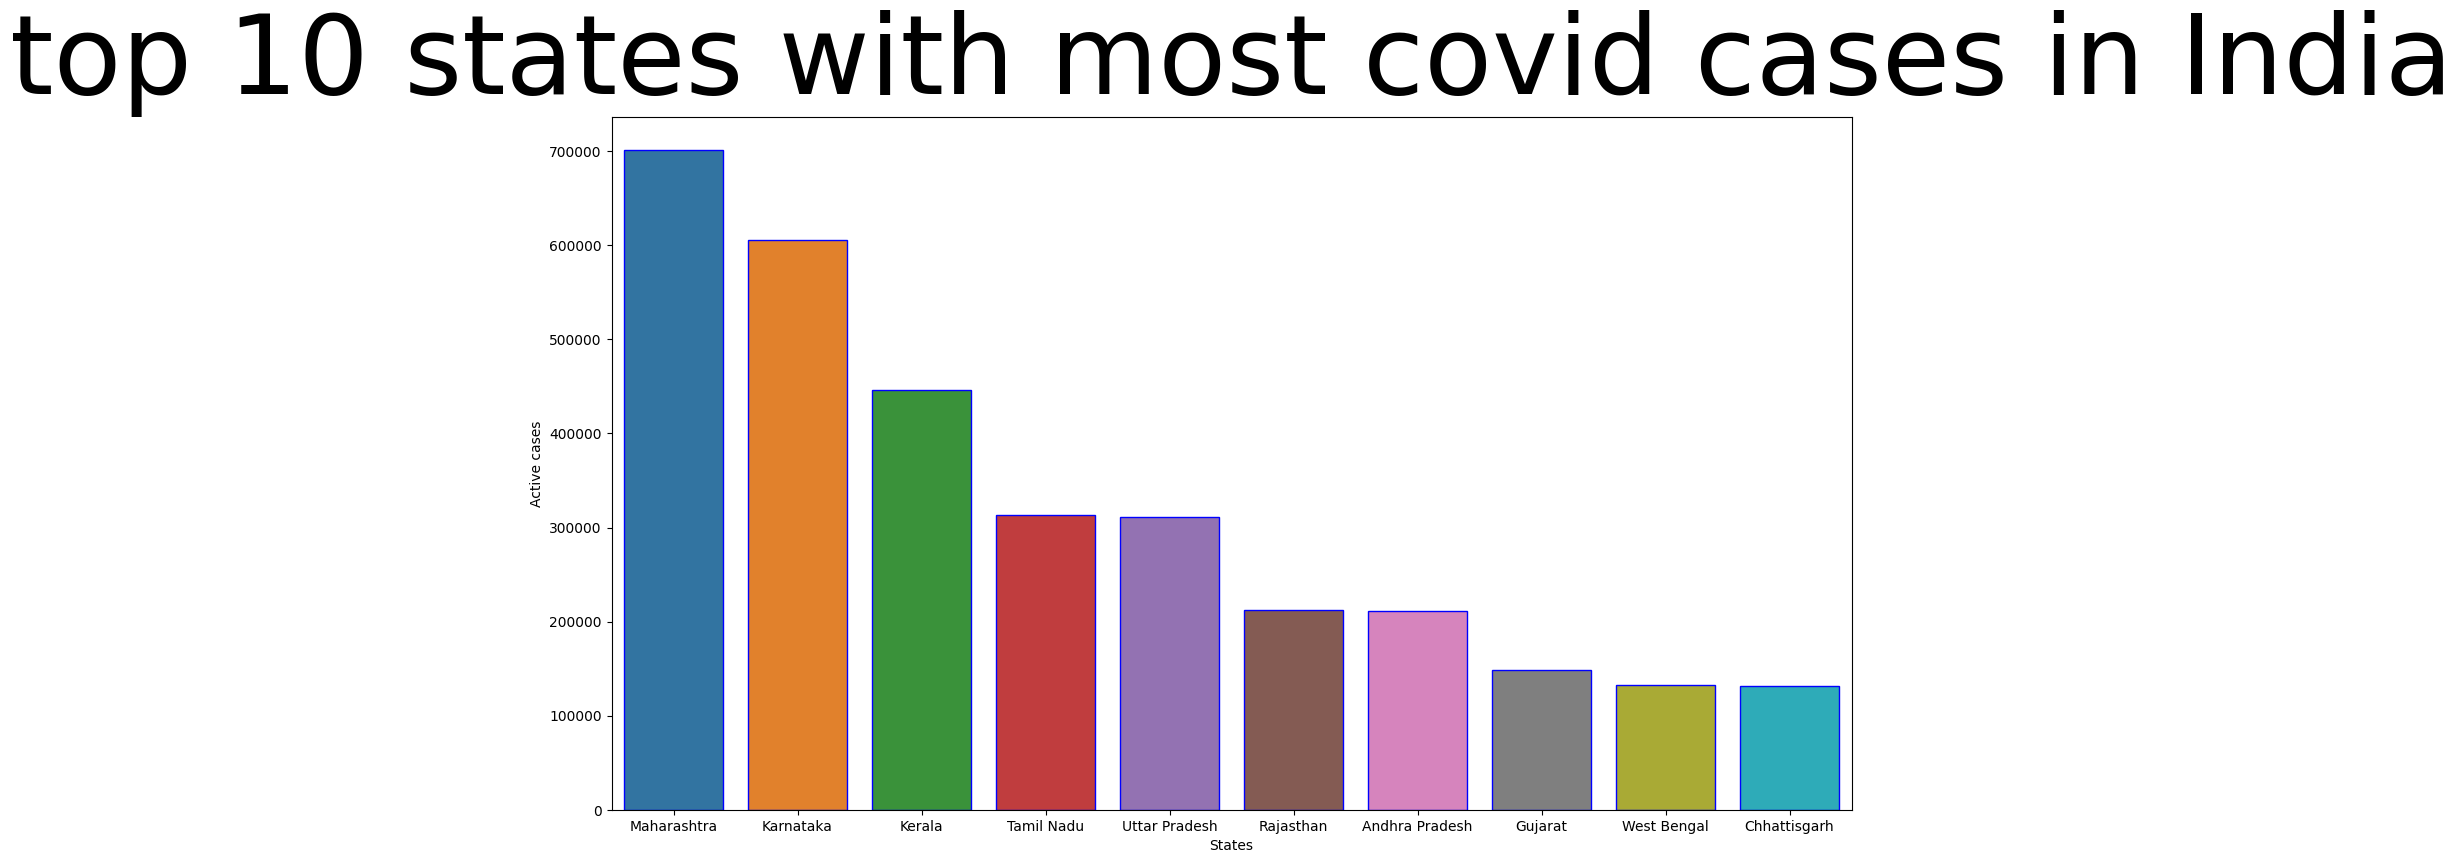

In [88]:
#Top 10 States with active cases
top_10_active=covid_df.groupby(by='State/UnionTerritory').max()[['Active cases','Date']].sort_values(by='Active cases',ascending=False).reset_index()
fig=plt.figure(figsize=(16,9))

plt.title("top 10 states with most covid cases in India",size=80)
ax=sns.barplot(data=top_10_active.iloc[:10],y="Active cases",x="State/UnionTerritory",linewidth=1,edgecolor='blue')
plt.xlabel("States")
plt.ylabel("Active cases")
plt.show()

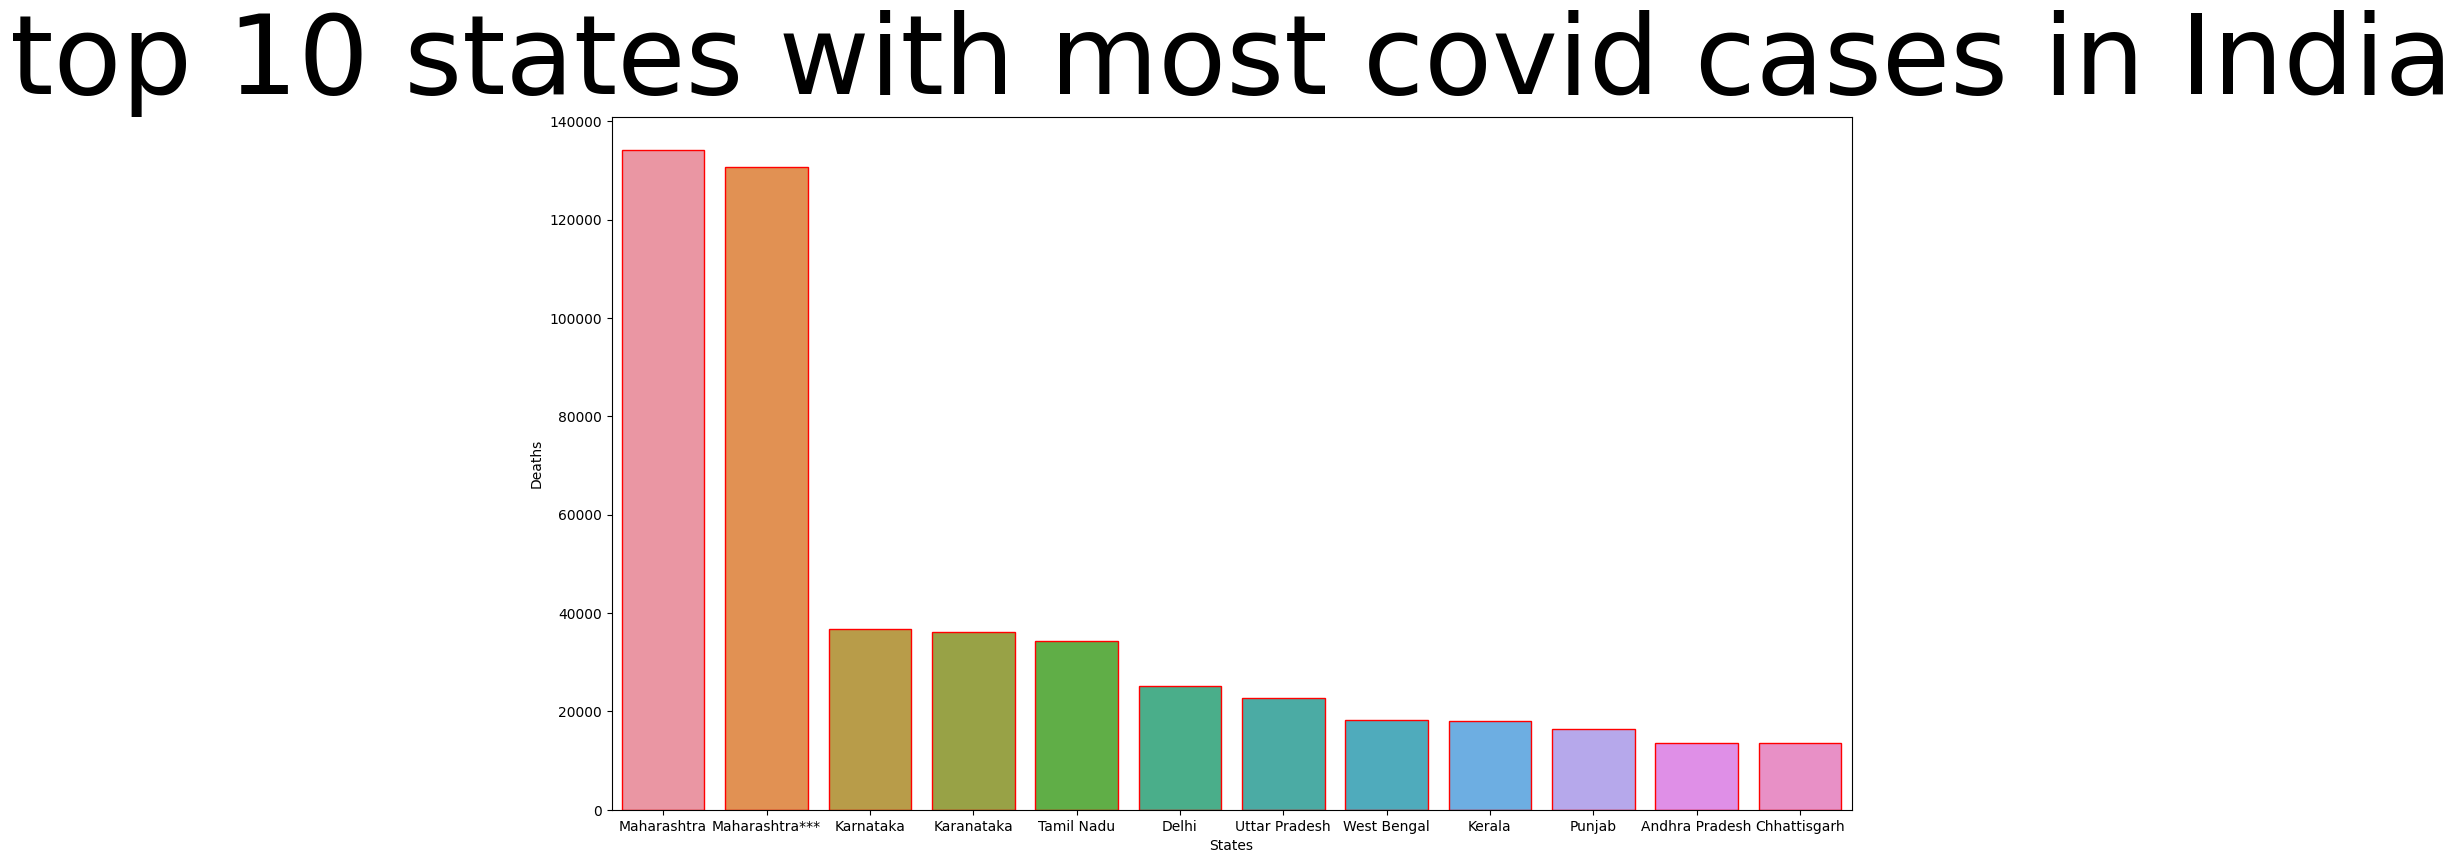

In [89]:
#Top 12 States with most deaths
top_10_active=covid_df.groupby(by='State/UnionTerritory').max()[['Deaths','Date']].sort_values(by='Deaths',ascending=False).reset_index()
fig=plt.figure(figsize=(16,9))

plt.title("top 10 states with most covid cases in India",size=80)
ax=sns.barplot(data=top_10_active.iloc[:12],y="Deaths",x="State/UnionTerritory",linewidth=1,edgecolor='red')
plt.xlabel("States")
plt.ylabel("Deaths")
plt.show()

In [90]:
#growth trends
fig=plt.figure(figsize=(22,10))


<Figure size 2200x1000 with 0 Axes>

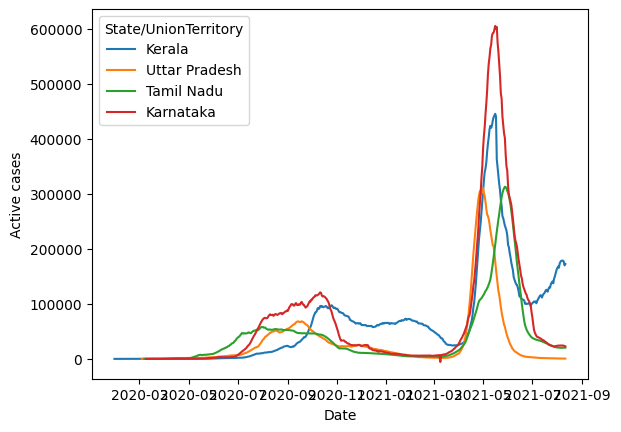

In [91]:
ax=sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharastra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])],x='Date',y='Active cases',hue='State/UnionTerritory')

In [122]:
vaccine_df=pd.read_csv('/content/drive/MyDrive/Datasets/covid_vaccine_statewise.csv')
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [123]:
vaccine_df.rename(columns ={'Updated On': 'Vaccine Date'},inplace=True)

In [124]:
vaccine_df.head()

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [125]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [126]:
vaccine_df.isnull().sum()

Vaccine Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [127]:
vaccination=vaccine_df.drop(columns=['Sputnik V (Doses Administered)','AEFI','Transgender(Individuals Vaccinated)'],axis=1)

In [141]:
vaccination.head()

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,CoviShield (Doses Administered),18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,47697.0,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,57969.0,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,98150.0,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,192508.0,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,247334.0,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,251280.0


In [142]:
#male vs female vaccinations
male=vaccination['Male(Individuals Vaccinated)'].sum()
female=vaccination['Female(Individuals Vaccinated)'].sum()
px.pie(names=["male","female"],values=[male,female], title="Vaccination chart")

In [132]:
#remove rows where state is India
vaccine=vaccine_df[vaccine_df.State!="India"]
vaccine.rename(columns={"Total Individuals Vaccinated":"Total"},inplace=True)

<ipython-input-132-4b41e073d137>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [133]:
vaccine

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
vaccine.rename(columns={"Total Individuals Vaccinated":"Total"},inplace=True)
vaccine.head(2)

<ipython-input-143-15dc2ecdc7d8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0


In [144]:
#most vaccinated states
max_vax=vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vax=max_vax.sort_values('Total',ascending=False)[:10]

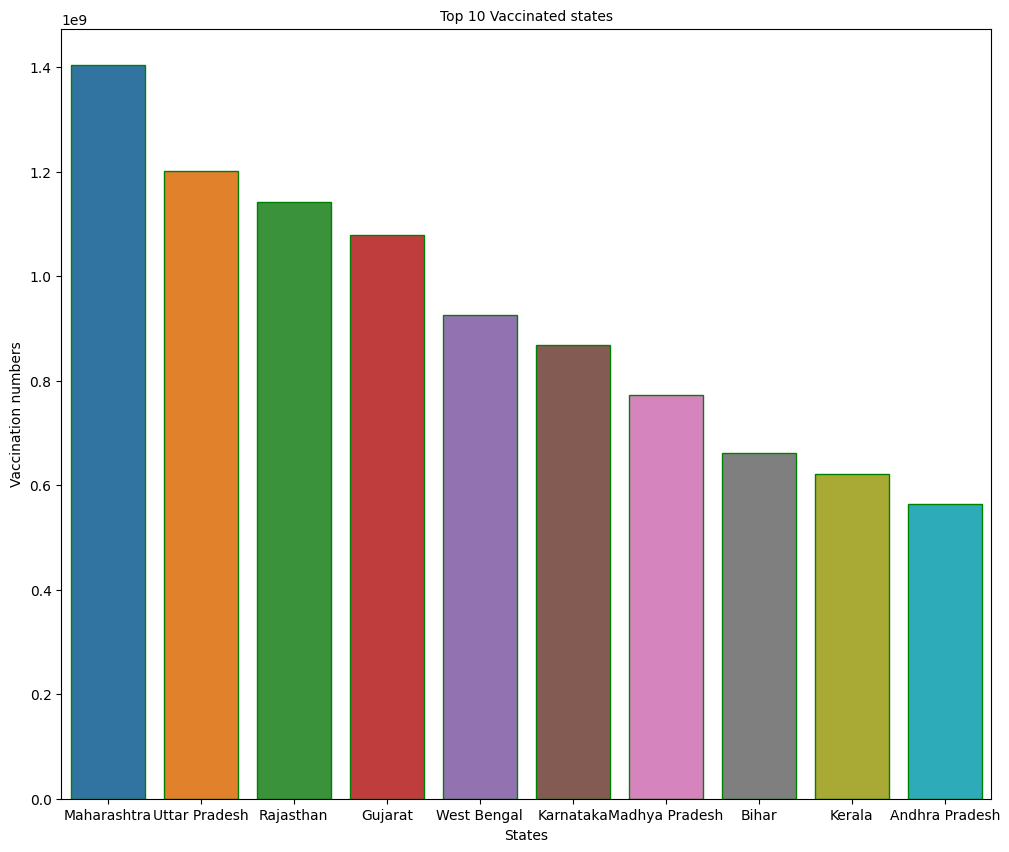

In [146]:
fig=plt.figure(figsize=(12,10))
plt.title("Top 10 Vaccinated states",size=10)
x=sns.barplot(data=max_vax.iloc[:10],y=max_vax.Total,x=max_vax.index,linewidth=1,edgecolor='green')
plt.xlabel("States")
plt.ylabel("Vaccination numbers")
plt.show()

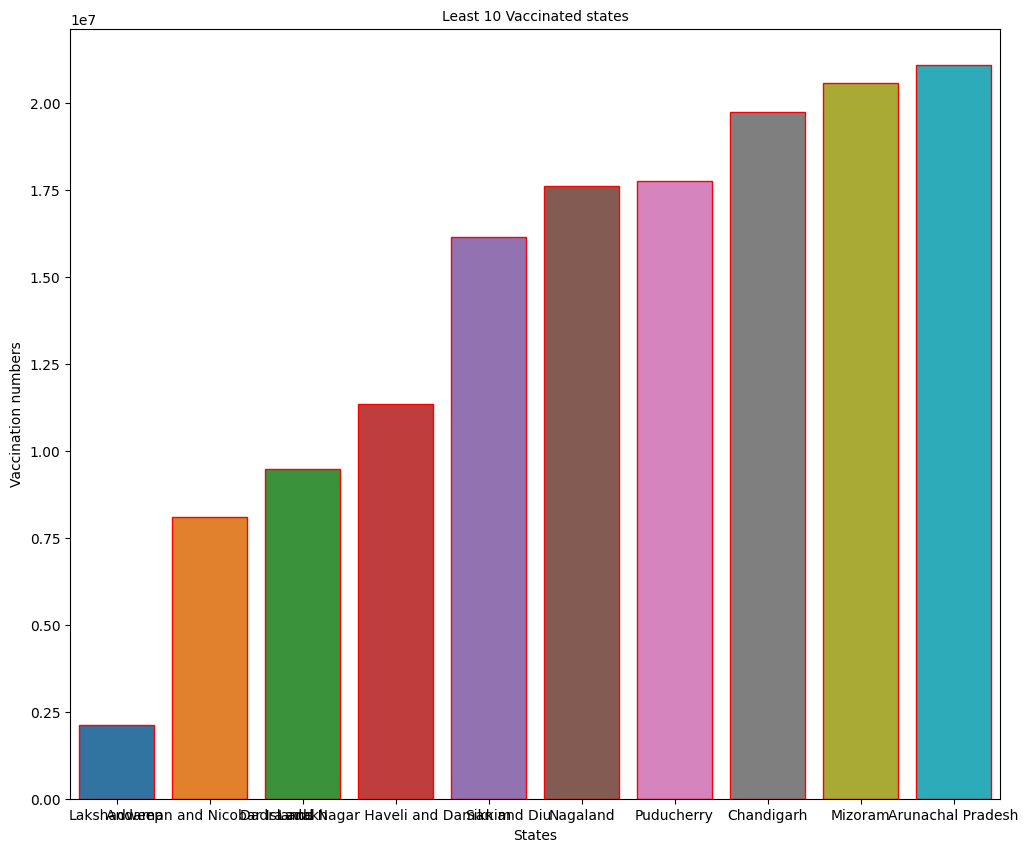

In [148]:
min_vax=vaccine.groupby('State')['Total'].sum().to_frame('Total')
min_vax=min_vax.sort_values('Total',ascending=True)[:10]
fig=plt.figure(figsize=(12,10))
plt.title("Least 10 Vaccinated states",size=10)
x=sns.barplot(data=min_vax.iloc[:10],y=min_vax.Total,x=min_vax.index,linewidth=1,edgecolor='red')
plt.xlabel("States")
plt.ylabel("Vaccination numbers")
plt.show()